# Personality Prediction Using Text Data

In this project, we aim to predict an individual's personality type based on their textual data using Natural Language Processing (NLP) and Machine Learning techniques. The dataset used contains MBTI (Myers–Briggs Type Indicator) personality types and corresponding text posts of individuals.


## Data Loading and Exploration

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("mbti_1.csv")

In [3]:
df.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [4]:
df.shape

(8675, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


In [6]:
df.describe()

,type,posts
count,8675,8675
unique,16,8675
top,INFP,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
freq,1832,1


In [7]:
df.isnull().sum()

type     0
posts    0
dtype: int64

## Exploratory Data Analysis

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\kdbts\AppData\Local\Temp\ipykernel_5240\1445912309.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='type',order=df['type'].value_counts().index,palette='viridis')


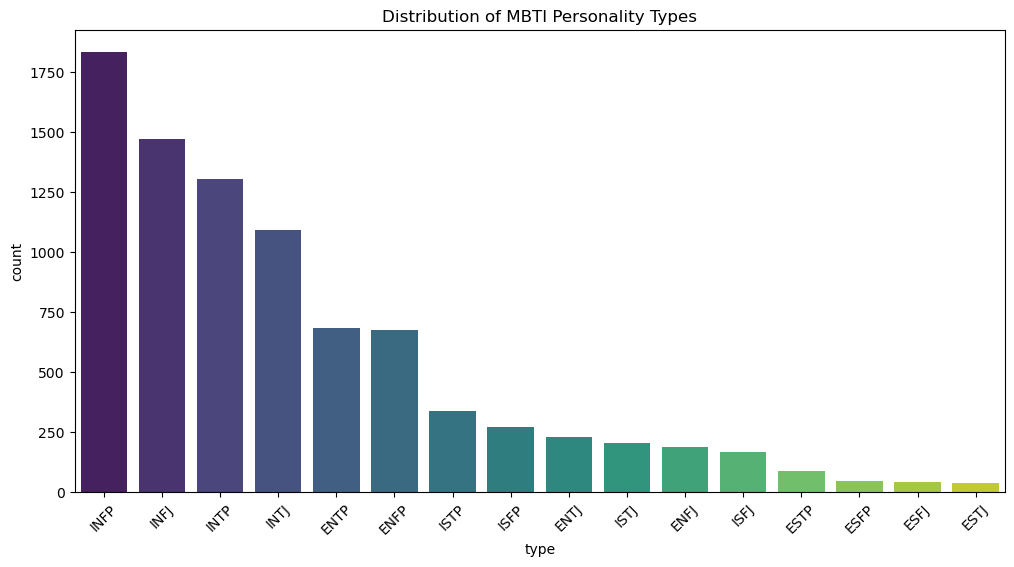

In [10]:
plt.figure(figsize=(12,6))
sns.countplot(data=df,x='type',order=df['type'].value_counts().index,palette='viridis')
plt.title("Distribution of MBTI Personality Types")
plt.xticks(rotation=45)
plt.show()

In [11]:
# check post length
df['post_length']=df['posts'].apply(lambda x: len(x.split()))

print(df['post_length'].describe())

count    8675.000000
mean     1226.241499
std       311.210544
min         4.000000
25%      1046.500000
50%      1278.000000
75%      1457.000000
max      1881.000000
Name: post_length, dtype: float64


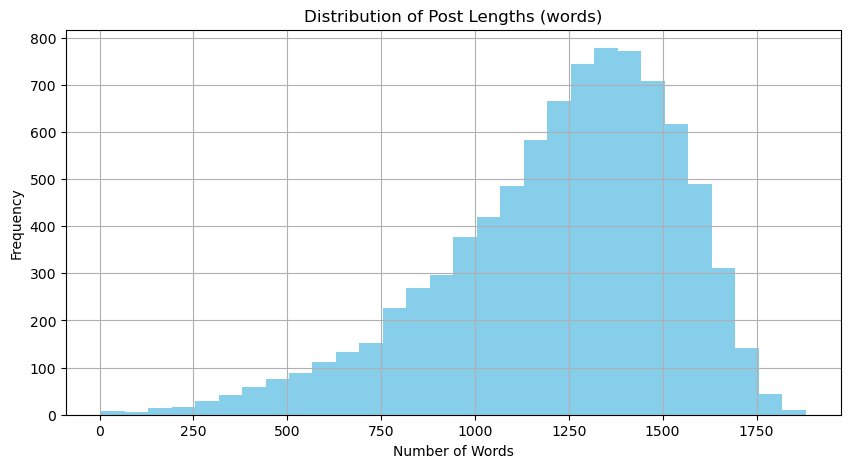

In [12]:
plt.figure(figsize=(10,5))
df['post_length'].hist(bins=30,color='skyblue')
plt.title("Distribution of Post Lengths (words)")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

C:\Users\kdbts\AppData\Local\Temp\ipykernel_5240\3898315408.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type',y='post_length',data=df,order=df['type'].value_counts().index,palette='pastel')


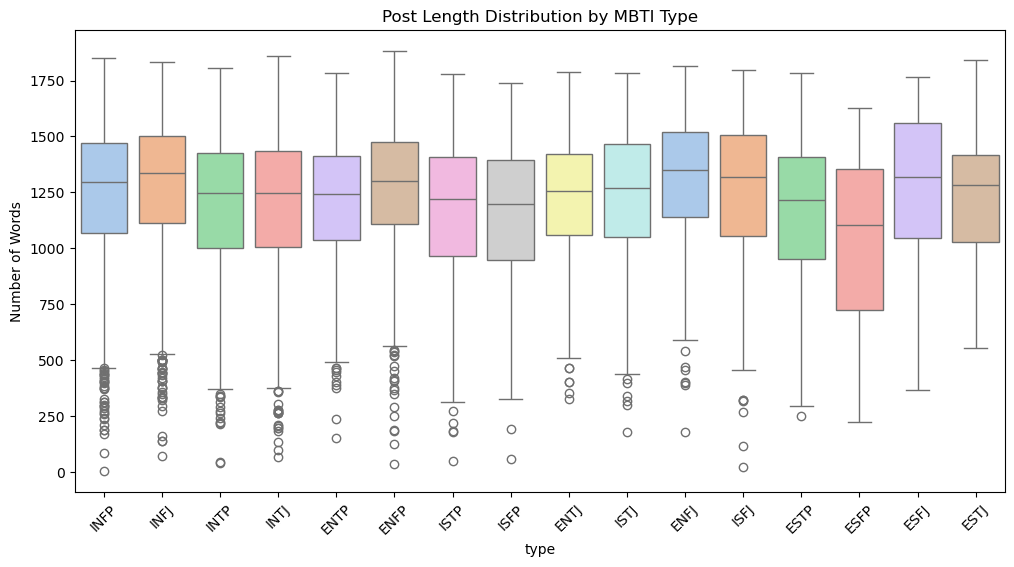

In [13]:
#Compare MBTI Type and post length

plt.figure(figsize=(12,6))
sns.boxplot(x='type',y='post_length',data=df,order=df['type'].value_counts().index,palette='pastel')
plt.xticks(rotation=45)
plt.title("Post Length Distribution by MBTI Type")
plt.ylabel("Number of Words")
plt.show()

## Text Preprocessing

We clean the text by:
- Removing links, punctuation, and special characters
- Lowercasing the text
- Removing stopwords
- Applying stemming or lemmatization


In [15]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [16]:
stop_words=set(stopwords.words('english'))
lemmatizer=WordNetLemmatizer()

def clean_text(text):
    #lowercase
    text=text.lower()

    #remove URLs
    text=re.sub(r'https\S+|www\S+|http\S+','',text,flags=re.MULTILINE)

    #remove punctuation and non-alphabet
    text=re.sub(r'[^a-z\s]','',text)

    #tokenize and remove stopwords
    words=text.split()
    words=[word for word in words if word not in stop_words]

    #lemmatize
    words=[lemmatizer.lemmatize(word,pos='v')for word in words]

    return " ".join(words)
    

In [17]:
df['clean_post']=df['posts'].apply(clean_text)

In [18]:
#word frequency
from collections import Counter
all_words=' '.join([str(text) for text in df['clean_post'] if isinstance(text,str)]).spilt()

word_freq=Counter(all_words)

print(word_freq.most_common(20))

AttributeError: 'str' object has no attribute 'spilt'

In [19]:
print(type(df['clean_post']))
print(type(df['clean_post'][0]))

<class 'pandas.core.series.Series'>
<class 'str'>


In [21]:
all_text = ' '.join(df['clean_post'].dropna().astype(str))
all_words = all_text.split()
print(all_words[:20])


['intj', 'moments', 'sportscenter', 'top', 'ten', 'play', 'prankswhat', 'lifechanging', 'experience', 'life', 'repeat', 'todaymay', 'perc', 'experience', 'immerse', 'youthe', 'last', 'thing', 'infj', 'friend']


In [23]:
from collections import Counter

# Count word frequencies
word_freq = Counter(all_words)

# Get the 20 most common words
top_20 = word_freq.most_common(20)

# Display them
for word, freq in top_20:
    print(f"{word}: {freq}")


like: 70786
think: 67157
im: 65553
dont: 50985
get: 49015
people: 45586
know: 42247
say: 36437
really: 34033
would: 33741
one: 33681
make: 33553
go: 33019
time: 31489
feel: 31390
want: 25692
type: 24735
see: 24346
ive: 24035
love: 23056


C:\Users\kdbts\AppData\Local\Temp\ipykernel_5240\4174261878.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=like_usage_by_type.index,y=like_usage_by_type.values,palette='magma')


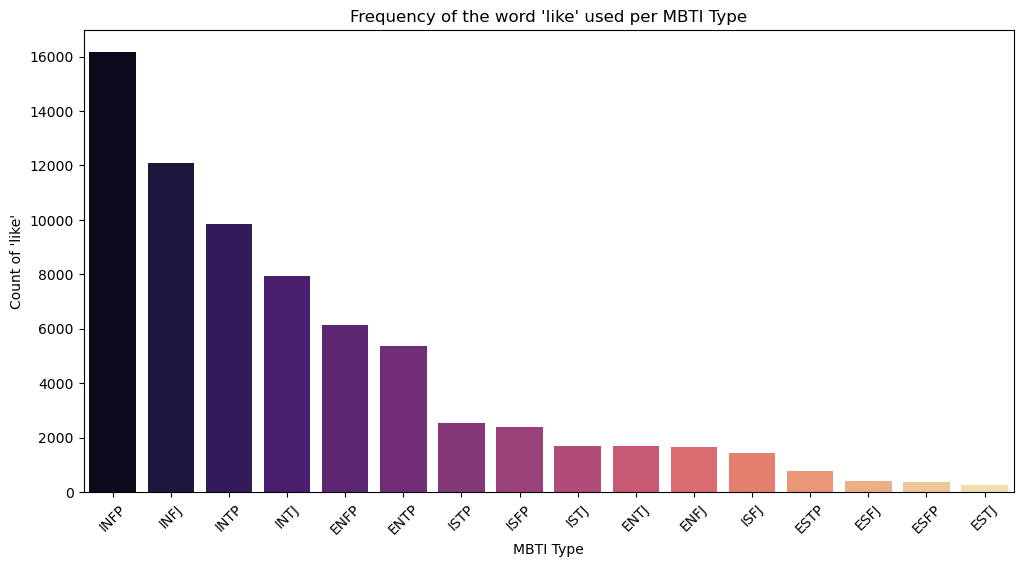

In [24]:
#column that counts how many time 'like' appeared in each post
df['like_count']=df['clean_post'].apply(lambda x : x.lower().split().count('like'))

#group mbti type & sum the counts
like_usage_by_type=df.groupby('type')['like_count'].sum().sort_values(ascending=False)

#plot
plt.figure(figsize=(12,6))
sns.barplot(x=like_usage_by_type.index,y=like_usage_by_type.values,palette='magma')
plt.title("Frequency of the word 'like' used per MBTI Type")
plt.xlabel('MBTI Type')
plt.ylabel("Count of 'like'")
plt.xticks(rotation=45)
plt.show()

In [25]:
# top 5 frequent words per MBTI Type

top_words_per_type={}

for personality in df['type'].unique():
    posts=df[df['type']==personality]['clean_post'].str.cat(sep=' ')
    tokens=posts.split()
    word_freq=Counter(tokens)
    top_words=word_freq.most_common(5)
    top_words_per_type[personality]=top_words

In [29]:
top_words_per_type

{'INFJ': [('like', 12107),
  ('think', 11897),
  ('im', 11655),
  ('dont', 8498),
  ('people', 8246)],
 'ENTP': [('like', 5365),
  ('think', 5340),
  ('im', 4898),
  ('get', 3981),
  ('dont', 3879)],
 'INTP': [('like', 9834),
  ('think', 9804),
  ('im', 8775),
  ('dont', 7760),
  ('get', 6914)],
 'INTJ': [('like', 7950),
  ('think', 7640),
  ('im', 6695),
  ('dont', 6279),
  ('people', 5616)],
 'ENTJ': [('like', 1699),
  ('think', 1694),
  ('im', 1518),
  ('get', 1346),
  ('dont', 1306)],
 'ENFJ': [('im', 1680),
  ('like', 1675),
  ('think', 1587),
  ('get', 1170),
  ('people', 1136)],
 'INFP': [('like', 16159),
  ('im', 15120),
  ('think', 14950),
  ('dont', 10933),
  ('get', 10509)],
 'ENFP': [('like', 6140),
  ('im', 5784),
  ('think', 5403),
  ('get', 4134),
  ('dont', 3779)],
 'ISFP': [('like', 2401),
  ('im', 2295),
  ('think', 2067),
  ('dont', 1604),
  ('get', 1584)],
 'ISTP': [('like', 2541),
  ('im', 2458),
  ('think', 2300),
  ('get', 2245),
  ('dont', 2223)],
 'ISFJ': [('im

In [30]:
top_words_df=pd.DataFrame.from_dict(top_words_per_type,orient='index',columns=['Word1','Word2','Word3','Word4','Word5'])

In [31]:
top_words_df

,Word1,Word2,Word3,Word4,Word5
INFJ,"(like, 12107)","(think, 11897)","(im, 11655)","(dont, 8498)","(people, 8246)"
ENTP,"(like, 5365)","(think, 5340)","(im, 4898)","(get, 3981)","(dont, 3879)"
INTP,"(like, 9834)","(think, 9804)","(im, 8775)","(dont, 7760)","(get, 6914)"
INTJ,"(like, 7950)","(think, 7640)","(im, 6695)","(dont, 6279)","(people, 5616)"
ENTJ,"(like, 1699)","(think, 1694)","(im, 1518)","(get, 1346)","(dont, 1306)"
ENFJ,"(im, 1680)","(like, 1675)","(think, 1587)","(get, 1170)","(people, 1136)"
INFP,"(like, 16159)","(im, 15120)","(think, 14950)","(dont, 10933)","(get, 10509)"
ENFP,"(like, 6140)","(im, 5784)","(think, 5403)","(get, 4134)","(dont, 3779)"
ISFP,"(like, 2401)","(im, 2295)","(think, 2067)","(dont, 1604)","(get, 1584)"
ISTP,"(like, 2541)","(im, 2458)","(think, 2300)","(get, 2245)","(dont, 2223)"


In [32]:
#better for plotting

import pandas as pd

data = []
for mbti_type, words in top_words_per_type.items():
    for word, count in words:  # ← changed `word_list` to `words`
        data.append({'type': mbti_type, 'word': word, 'count': count})

top_words_df = pd.DataFrame(data)


In [33]:
print(type(top_words_per_type))

<class 'dict'>


In [34]:
print(top_words_df.head())
print(top_words_df.columns)


   type    word  count
0  INFJ    like  12107
1  INFJ   think  11897
2  INFJ      im  11655
3  INFJ    dont   8498
4  INFJ  people   8246
Index(['type', 'word', 'count'], dtype='object')


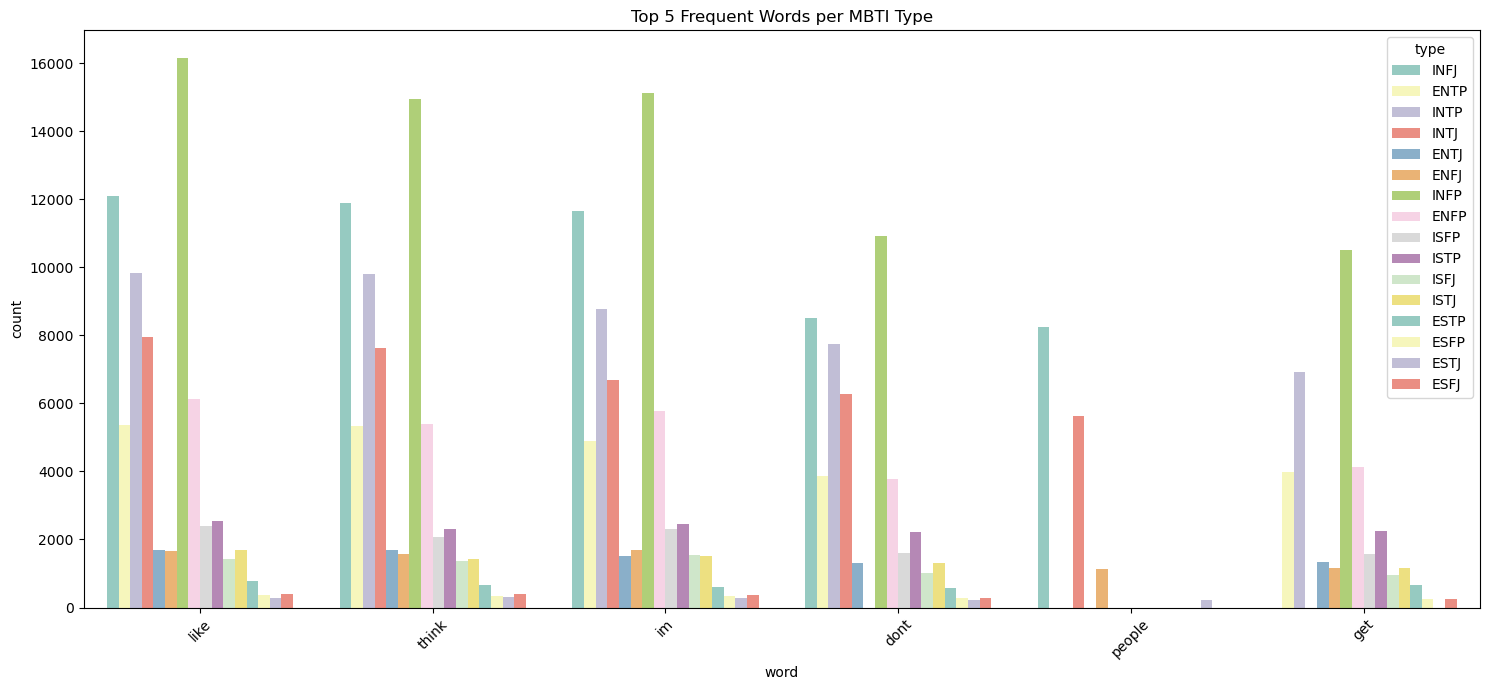

In [35]:
plt.figure(figsize=(15,7))
plt.title('Top 5 Frequent Words per MBTI Type')
sns.barplot(data=top_words_df,x='word',y='count',hue='type',palette='Set3')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\kdbts\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\kdbts\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\kdbts\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\kdbts\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and 

AttributeError: 'numpy.ndarray' object has no attribute 'faltten'

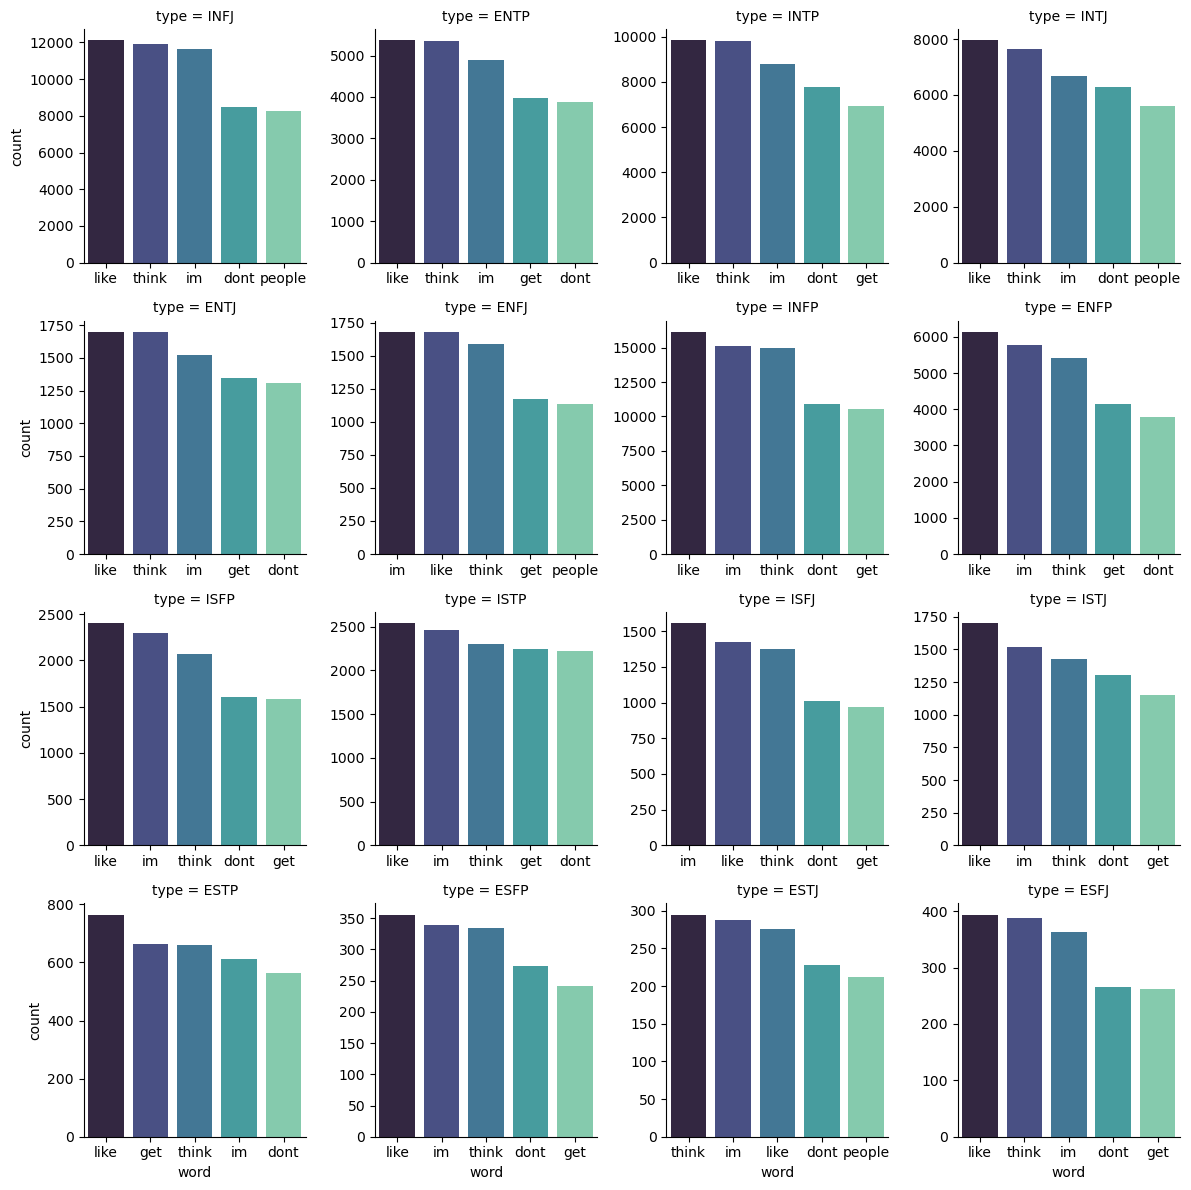

In [36]:
g=sns.FacetGrid(top_words_df,col='type',col_wrap=4,height=3,sharex=False,sharey=False)
g.map_dataframe(sns.barplot,x='word',y='count',palette='mako')

for ax in g.axes.faltten():
    ax.subplots_adjust(top=0.92)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right')

g.fig.tight_layout()
plt.subplots_adjust(top=0.92)
g.fig.suptitle("Top 5 Words used by each MBTI Type",fontsize=16)
plt.show()

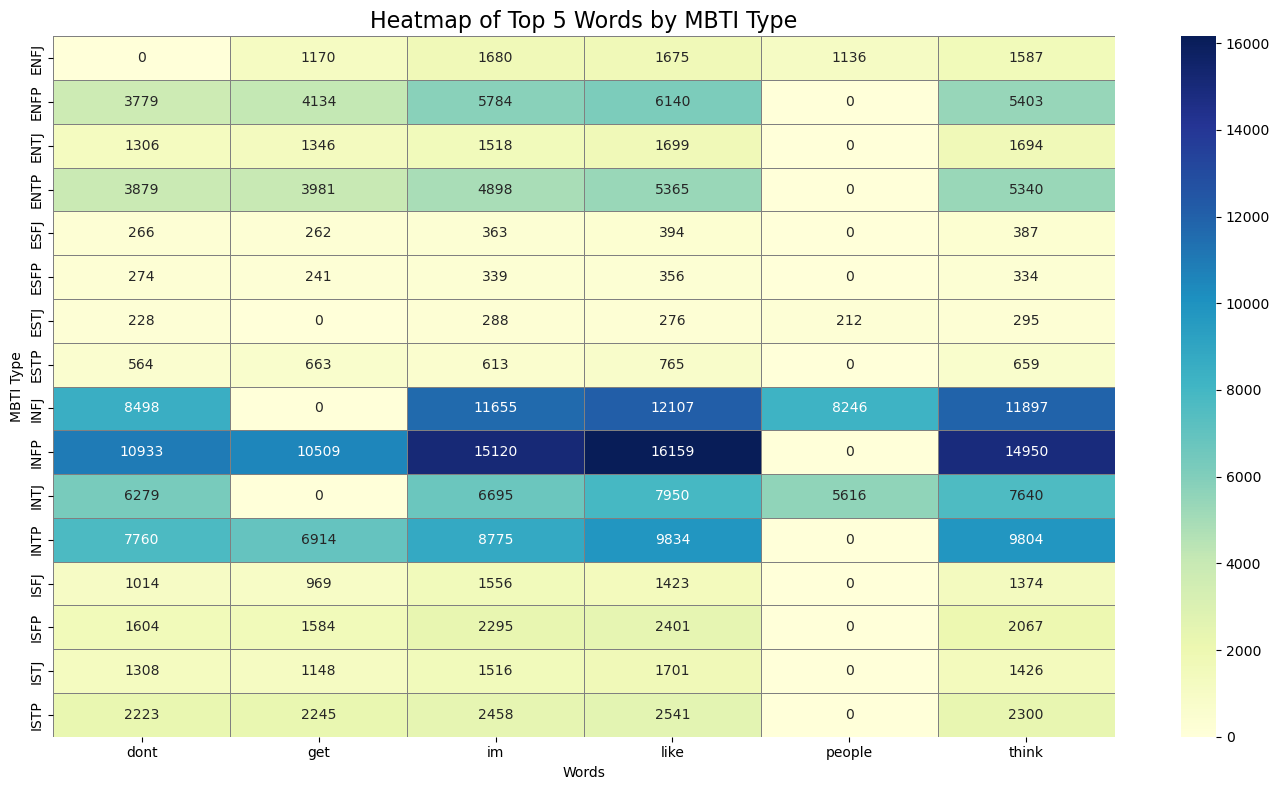

In [37]:
#create a matrix for the heatmap
heatmap_data = top_words_df.pivot(index="type", columns="word", values="count").fillna(0)

# Set up the plot size
plt.figure(figsize=(14, 8))

# Create the heatmap
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=0.5, linecolor='gray')

# Add titles and labels
plt.title("Heatmap of Top 5 Words by MBTI Type", fontsize=16)
plt.xlabel("Words")
plt.ylabel("MBTI Type")

# Show the plot
plt.tight_layout()
plt.show()


## Feature Extraction using TF-IDF

We use the Term Frequency-Inverse Document Frequency (TF-IDF) method to convert textual data into numerical features that can be fed into machine learning models.


In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer=TfidfVectorizer(max_features=1000,stop_words='english')

tfidf_matrix=tfidf_vectorizer.fit_transform(df['posts'])

tfidf_names=tfidf_vectorizer.get_feature_names_out()

tfidf_df=pd.DataFrame(tfidf_matrix.toarray(),columns=tfidf_names)

print(tfidf_df.head())

         10  100   12   15   16        20       30        50  ability  \
0  0.000000  0.0  0.0  0.0  0.0  0.036825  0.00000  0.043309  0.00000   
1  0.035678  0.0  0.0  0.0  0.0  0.000000  0.00000  0.000000  0.00000   
2  0.055141  0.0  0.0  0.0  0.0  0.000000  0.07435  0.000000  0.13799   
3  0.000000  0.0  0.0  0.0  0.0  0.000000  0.00000  0.065110  0.00000   
4  0.000000  0.0  0.0  0.0  0.0  0.000000  0.00000  0.000000  0.00000   

       able  ...      yeah      year     years       yep       yes  yesterday  \
0  0.000000  ...  0.000000  0.000000  0.020116  0.042357  0.000000        0.0   
1  0.030969  ...  0.000000  0.028775  0.000000  0.000000  0.000000        0.0   
2  0.047863  ...  0.000000  0.044472  0.146055  0.000000  0.032673        0.0   
3  0.079282  ...  0.032555  0.000000  0.000000  0.000000  0.000000        0.0   
4  0.000000  ...  0.000000  0.035745  0.000000  0.000000  0.052522        0.0   

   young  younger    youtu   youtube  
0    0.0      0.0  0.00000  0.34166

In [40]:
# Add personality column
tfidf_df['personality'] = df['type'].values

# Group by personality and calculate mean TF-IDF score per word
grouped_tfidf = tfidf_df.groupby('personality').mean()

# For each personality type, get top N words by mean TF-IDF score
top_n = 10
top_words_per_type = {}
for personality in grouped_tfidf.index:
    sorted_words = grouped_tfidf.loc[personality].sort_values(ascending=False)
    top_words_per_type[personality] = sorted_words.head(top_n)

# Now top_words_per_type is a dict with personality as key, and Series of top words as value


In [41]:
data = []
for personality, word_series in top_words_per_type.items():
    for word, score in word_series.items():
        data.append({'personality': personality, 'word': word, 'tfidf_score': score})

top_words_tfidf_df = pd.DataFrame(data)


C:\Users\kdbts\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\kdbts\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\kdbts\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\kdbts\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and 

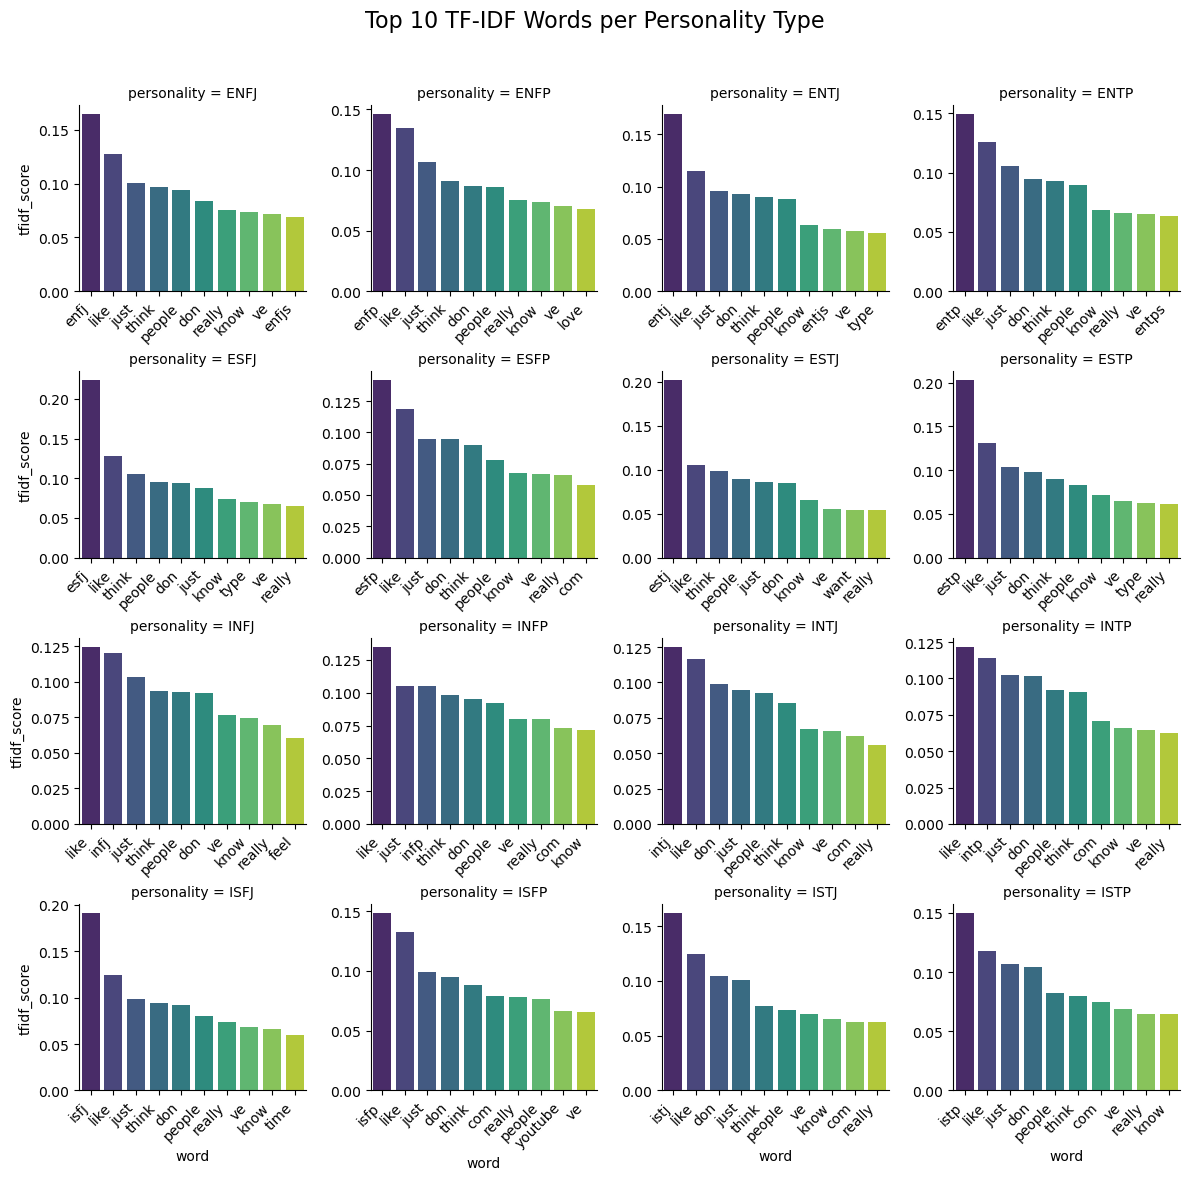

In [42]:
g = sns.FacetGrid(top_words_tfidf_df, col='personality', col_wrap=4, height=3, sharex=False, sharey=False)

# Map barplot for each facet
g.map_dataframe(sns.barplot, x='word', y='tfidf_score', palette='viridis')

# Rotate x-axis labels for readability
for ax in g.axes.flatten():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

g.fig.tight_layout()
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Top 10 TF-IDF Words per Personality Type', fontsize=16)

plt.show()


In [43]:
import re

mbti_types = ['INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP',
              'ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP']

# Function to remove MBTI types (case-insensitive)
def remove_mbti_types(text):
    for mbti in mbti_types:
        text = re.sub(r'\b' + mbti + r'\b', '', text, flags=re.IGNORECASE)
    return text


In [44]:
df['cleaned_posts'] = df['posts'].apply(remove_mbti_types)


In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X_tfidf = vectorizer.fit_transform(df['cleaned_posts'])

# Convert to DataFrame for analysis
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df['personality'] = df['type'].values


In [47]:
# Step 1: Vectorize the cleaned posts
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X_tfidf = vectorizer.fit_transform(df['cleaned_posts'])

# Step 2: Convert to DataFrame
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

# Step 3: Add personality column
tfidf_df['personality'] = df['type'].values

# Step 4: Group by personality and calculate mean TF-IDF score per word
grouped_tfidf = tfidf_df.groupby('personality').mean()

# Step 5: For each personality type, extract top N words by mean TF-IDF score
top_n = 10
top_words_per_type = {}
for personality in grouped_tfidf.index:
    sorted_words = grouped_tfidf.loc[personality].sort_values(ascending=False)
    top_words_per_type[personality] = sorted_words.head(top_n)


C:\Users\kdbts\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\kdbts\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\kdbts\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\kdbts\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and 

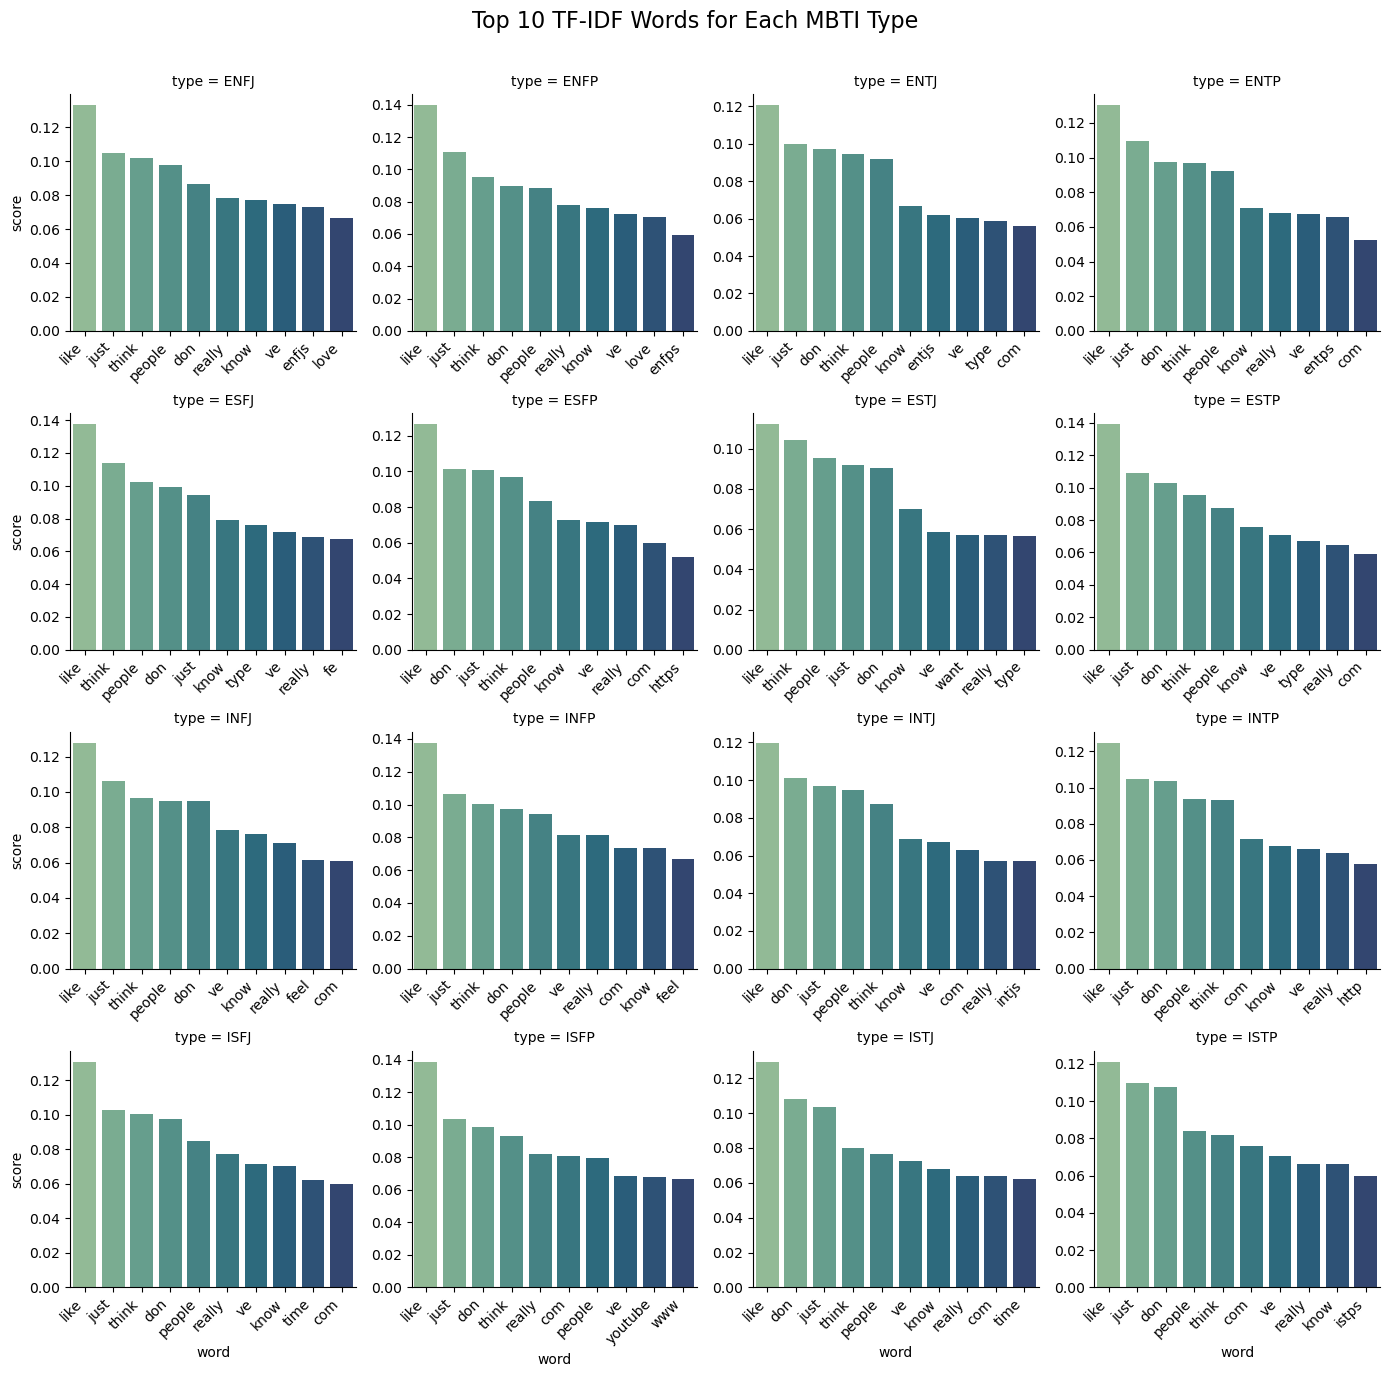

In [48]:
tfidf_top_words = []

for personality, words_series in top_words_per_type.items():
    for word, score in words_series.items():
        tfidf_top_words.append({'type': personality, 'word': word, 'score': score})

tfidf_top_df = pd.DataFrame(tfidf_top_words)

# Step 2: Create FacetGrid
g = sns.FacetGrid(tfidf_top_df, col="type", col_wrap=4, height=3.5, sharex=False, sharey=False)

# Step 3: Map barplot
g.map_dataframe(sns.barplot, x="word", y="score", palette="crest")

# Step 4: Rotate labels for readability
for ax in g.axes.flatten():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Step 5: Layout adjustments
g.fig.tight_layout()
plt.subplots_adjust(top=0.92)
g.fig.suptitle("Top 10 TF-IDF Words for Each MBTI Type", fontsize=16)

plt.show()


In [57]:
from sklearn.decomposition import TruncatedSVD

# Choose number of components
n_components = 2

# Initialize and fit SVD
svd = TruncatedSVD(n_components=n_components, random_state=42)
reduced_matrix = svd.fit_transform(tfidf_matrix)

# Check shape of reduced matrix
print("Original shape:", tfidf_matrix.shape)
print("Reduced shape:", reduced_matrix.shape)


Original shape: (8675, 1000)
Reduced shape: (8675, 2)


In [59]:
# Create a DataFrame with 2D reduced components and personality labels
reduced_matrix = pd.DataFrame(reduced_matrix, columns=['Component_1', 'Component_2'])
reduced_matrix['Personality'] = df['type'].values

## Visualizing Personality Clusters

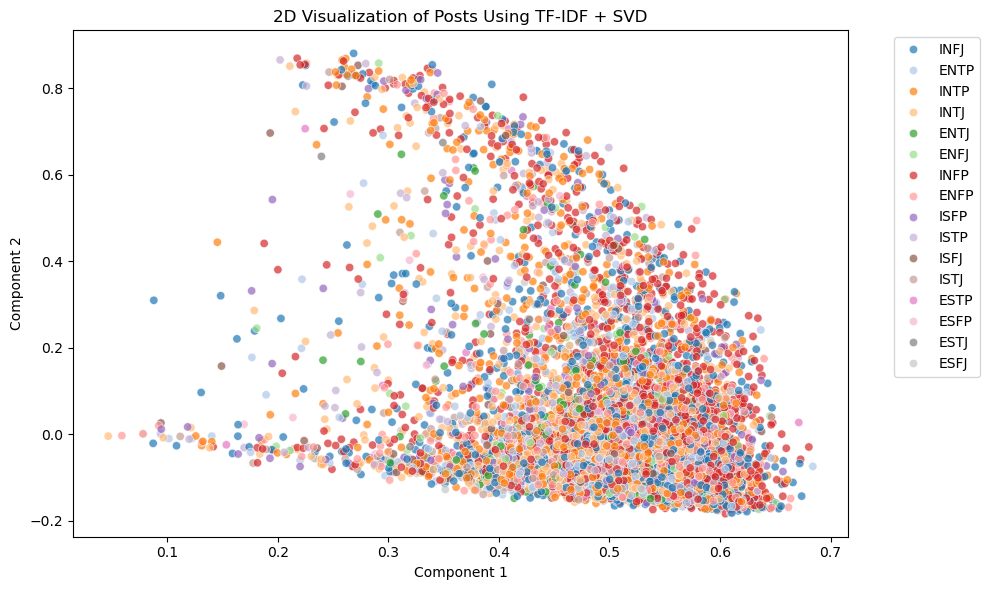

In [63]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=reduced_matrix, x='Component_1', y='Component_2', hue='Personality', palette='tab20', alpha=0.7)
plt.title("2D Visualization of Posts Using TF-IDF + SVD")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)
plt.tight_layout()
plt.show()


In [65]:
from sklearn.model_selection import train_test_split

# Features (TF-IDF matrix)
X = tfidf_matrix

# Labels (personality types)
y = df['type']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize the model
model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6622478386167147

Classification Report:
               precision    recall  f1-score   support

        ENFJ       0.62      0.21      0.31        38
        ENFP       0.76      0.62      0.69       135
        ENTJ       0.73      0.41      0.53        46
        ENTP       0.64      0.55      0.59       137
        ESFJ       1.00      0.11      0.20         9
        ESFP       0.00      0.00      0.00        10
        ESTJ       0.00      0.00      0.00         8
        ESTP       0.71      0.28      0.40        18
        INFJ       0.68      0.72      0.70       294
        INFP       0.62      0.85      0.72       366
        INTJ       0.63      0.66      0.64       218
        INTP       0.69      0.83      0.75       261
        ISFJ       0.60      0.27      0.38        33
        ISFP       0.81      0.39      0.53        54
        ISTJ       0.86      0.29      0.44        41
        ISTP       0.67      0.49      0.57        67

    accuracy              

C:\Users\kdbts\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kdbts\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kdbts\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [69]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, df['type'], test_size=0.2, random_state=42)

# Use 'balanced' to automatically adjust weights inversely proportional to class frequencies
model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6564841498559078

Classification Report:
               precision    recall  f1-score   support

        ENFJ       0.53      0.61      0.57        41
        ENFP       0.68      0.65      0.66       125
        ENTJ       0.42      0.70      0.53        44
        ENTP       0.64      0.64      0.64       135
        ESFJ       0.09      0.29      0.13         7
        ESFP       0.05      0.12      0.07         8
        ESTJ       0.29      0.57      0.38         7
        ESTP       0.47      0.60      0.53        15
        INFJ       0.75      0.58      0.65       288
        INFP       0.77      0.71      0.74       370
        INTJ       0.67      0.66      0.66       193
        INTP       0.78      0.71      0.75       293
        ISFJ       0.53      0.64      0.58        45
        ISFP       0.50      0.62      0.55        53
        ISTJ       0.47      0.66      0.55        44
        ISTP       0.52      0.66      0.58        67

    accuracy              

In [71]:
pip install imbalanced-learn


## Handling Class Imbalance using SMOTE

To improve prediction for minority classes, we applied SMOTE (Synthetic Minority Oversampling Technique). This balances the dataset by oversampling underrepresented classes.


In [75]:
from imblearn.over_sampling import SMOTE
# Split data (before SMOTE)
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, df['type'], test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE only on training data
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", X_train.shape, y_train.shape)
print("After SMOTE:", X_train_sm.shape, y_train_sm.shape)


Before SMOTE: (6940, 1000) (6940,)
After SMOTE: (23456, 1000) (23456,)


In [79]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_sm, y_train_sm)

# Evaluate
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6518731988472622
Classification Report:
               precision    recall  f1-score   support

        ENFJ       0.50      0.68      0.58        38
        ENFP       0.64      0.60      0.62       135
        ENTJ       0.49      0.59      0.53        46
        ENTP       0.62      0.61      0.62       137
        ESFJ       0.43      0.33      0.38         9
        ESFP       0.09      0.10      0.10        10
        ESTJ       0.42      0.62      0.50         8
        ESTP       0.50      0.72      0.59        18
        INFJ       0.73      0.63      0.67       294
        INFP       0.77      0.69      0.73       366
        INTJ       0.66      0.63      0.64       218
        INTP       0.75      0.75      0.75       261
        ISFJ       0.40      0.61      0.48        33
        ISFP       0.39      0.52      0.45        54
        ISTJ       0.42      0.63      0.50        41
        ISTP       0.62      0.72      0.67        67

    accuracy               

## Confusion Matrix Analysis

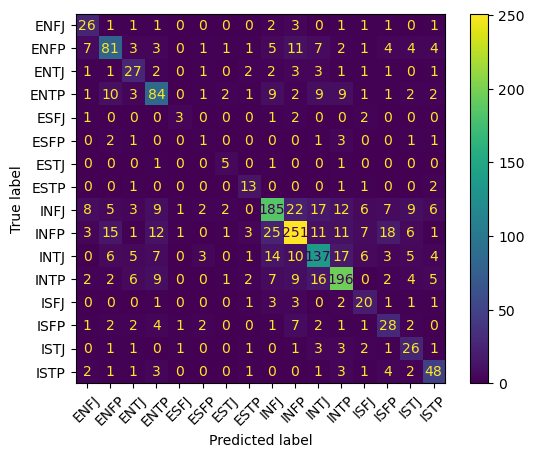

In [85]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# If y_test is a string like 'INTJ', 'INFP', etc.
labels = sorted(df['type'].unique())  # list of personality types in sorted order

cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(xticks_rotation=45)


- **INFP**, **INTP**, and **INFJ** are predicted most accurately. These classes also had more samples, helping the model learn better patterns.
- Less frequent classes like **ESFP**, **ESFJ**, and **ESTJ** have lower precision and recall. The model often confuses them with more dominant classes.
- The model shows **confusion between similar personality types**, especially those with overlapping traits (e.g., ENTP and ENFP, ISTP and ISFP).
- After applying **SMOTE**, performance improved for rare classes like **ESTJ** and **ISTP**, though some classes like **ESFP** still struggled.
- The **diagonal cells** (where predicted = actual) are the brightest — which means these are the correctly predicted labels.
